In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from math import sqrt

In [2]:
dirname= f'multicloudvar3/'
data_dir = pathlib.Path(dirname)
if data_dir.exists():
    # Get all pickle files in the directory
    pickle_files = [f for f in data_dir.iterdir() if f.is_file() and f.suffix == ".pkl"]

    # Create a dictionary to store loaded DataFrames
    dataframes = {}

    # Loop through each pickle file
    for filename in pickle_files:
        # Build the full filepath
        filepath = filename
        
        # Load the DataFrame from the pickle file
        try:
            df = pd.read_pickle(filepath)
            # Store the DataFrame in the dictionary with filename as key
            dataframes[filename.name] = df
        except (IOError, EOFError) as e:
            print(f"Error loading file {filename}: {e}")

    # Merge loaded DataFrames
    merged_df = pd.concat(dataframes.values())

    # You can now use the merged_df for further analysis

    print("DataFrames loaded and merged successfully!")

DataFrames loaded and merged successfully!


In [3]:
scale = 1.0

for arow in range(3):
    for acol in range(arow+1):
        colname = f'covmat{arow}{acol}'
        print(colname)
        merged_df[colname]=merged_df['covmat'].apply(lambda x: x[arow,acol]) * scale
        

covmat00
covmat10
covmat11
covmat20
covmat21
covmat22


In [4]:
merged_df

,ncams,azim,alpha,k,phi,covmat,covmat00,covmat10,covmat11,covmat20,covmat21,covmat22
0,2,-0.05,0.9740227102071893,49.42641544828446,-0.9647109735462621,"[[0.027146900021977192, 0.0, 0.0], [-0.0052783...",0.027147,-0.005278,0.028181,8.291745e-07,0.000829,0.027633
1,2,-0.05,0.9659947619048294,49.58359940294587,-0.9772343949348942,"[[0.026823838998130563, 0.0, 0.0], [-0.0046430...",0.026824,-0.004643,0.028358,4.260052e-04,-0.000251,0.027634
2,2,-0.05,0.9676744813194484,49.61712004417651,-0.8969475694576939,"[[0.02732576181337052, 0.0, 0.0], [-0.00412950...",0.027326,-0.004130,0.028343,-7.953282e-04,0.000224,0.027473
3,2,-0.05,0.9700249402611254,49.556699475710104,-0.9357886776522514,"[[0.027697174936654058, 0.0, 0.0], [-0.0043432...",0.027697,-0.004343,0.028055,-4.652190e-04,-0.000296,0.028319
4,2,-0.05,0.9708568757059937,49.59264459953721,-0.971247352483137,"[[0.027719178755146057, 0.0, 0.0], [-0.0050541...",0.027719,-0.005054,0.028396,4.869940e-05,-0.000020,0.028003
...,...,...,...,...,...,...,...,...,...,...,...,...
15,6,0.20,0.9087952663335707,49.89840257767523,-0.9614716467650046,"[[0.027197103655028705, 0.0, 0.0], [0.00062165...",0.027197,0.000622,0.027834,1.589822e-05,0.000074,0.027855
16,6,0.20,0.9069258802666016,49.63813474804224,-0.9886611371239975,"[[0.027239209177937786, 0.0, 0.0], [-0.0001978...",0.027239,-0.000198,0.027345,2.759618e-04,0.000100,0.027673
17,6,0.20,0.9229091727460423,49.83761267288586,-0.9456186892114606,"[[0.027000379563674178, 0.0, 0.0], [5.48021678...",0.027000,0.000055,0.027305,6.904137e-05,0.000736,0.027554
18,6,0.20,0.9179759605197929,49.843691240590154,-0.9818814008585176,"[[0.02774623184590295, 0.0, 0.0], [1.713556688...",0.027746,0.000017,0.027270,2.174319e-06,-0.000183,0.027596


In [5]:
merged_df[['alpha']]

,alpha
0,0.9740227102071893
1,0.9659947619048294
2,0.9676744813194484
3,0.9700249402611254
4,0.9708568757059937
...,...
15,0.9087952663335707
16,0.9069258802666016
17,0.9229091727460423
18,0.9179759605197929


In [6]:
averages = merged_df.groupby(['ncams','azim'])[['phi', 'alpha', 'k', 'covmat00', 'covmat10', 'covmat11', 'covmat20', 'covmat21', 'covmat22']].mean(False)

In [7]:
stds = merged_df.groupby(['ncams','azim'])[['phi', 'alpha', 'k', 'covmat00', 'covmat10', 'covmat11', 'covmat20', 'covmat21', 'covmat22']].std(ddof=1, numeric_only=False)

In [8]:
#x = list(averages.groupby('azim').groups) # values of azim
x=list(averages.groupby('ncams').get_group(2).groupby('azim').groups)


In [9]:
x3=list(averages.groupby('ncams').get_group(3).groupby('azim').groups)

In [10]:
#x4=list(averages.groupby('ncams').get_group(4).groupby('azim').groups)

In [11]:
x6=list(averages.groupby('ncams').get_group(6).groupby('azim').groups)

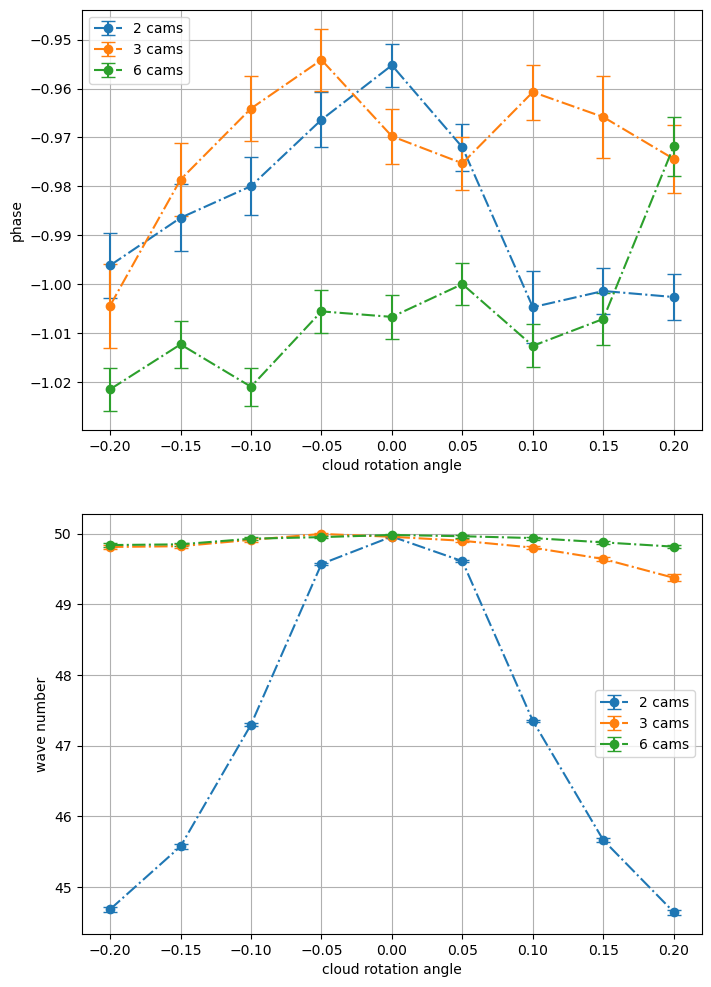

In [23]:
vars = ['phi', 'k']
ylabels = ['phase', 'wave number']
nrows = len(vars)
fig, ax = plt.subplots(nrows, 1, figsize=(8, nrows*6))
scale = 1.0/sqrt(18.0)
for var, ylabel, idx in zip(vars, ylabels, range(len(vars))):
    plt.sca(ax[idx])
    plt.errorbar(x, averages.groupby('ncams').get_group(2)[var], yerr=scale*stds.groupby('ncams').get_group(2)[var], capsize=5.0, fmt='-.o', label='2 cams')
    #plt.errorbar(x4, averages.groupby('ncams').get_group(4)[var], yerr=2.0*stds.groupby('ncams').get_group(4)[var], capsize=5.0, fmt='.', label='4 cams')
    plt.errorbar(x3, averages.groupby('ncams').get_group(3)[var], yerr=scale*stds.groupby('ncams').get_group(3)[var], capsize=5.0, fmt='-.o', label='3 cams')
    plt.errorbar(x6, averages.groupby('ncams').get_group(6)[var], yerr=scale*stds.groupby('ncams').get_group(6)[var], capsize=5.0, fmt='-.o', label='6 cams')
    plt.grid()
    plt.xlabel('cloud rotation angle')
    plt.ylabel(ylabel)
    plt.legend()

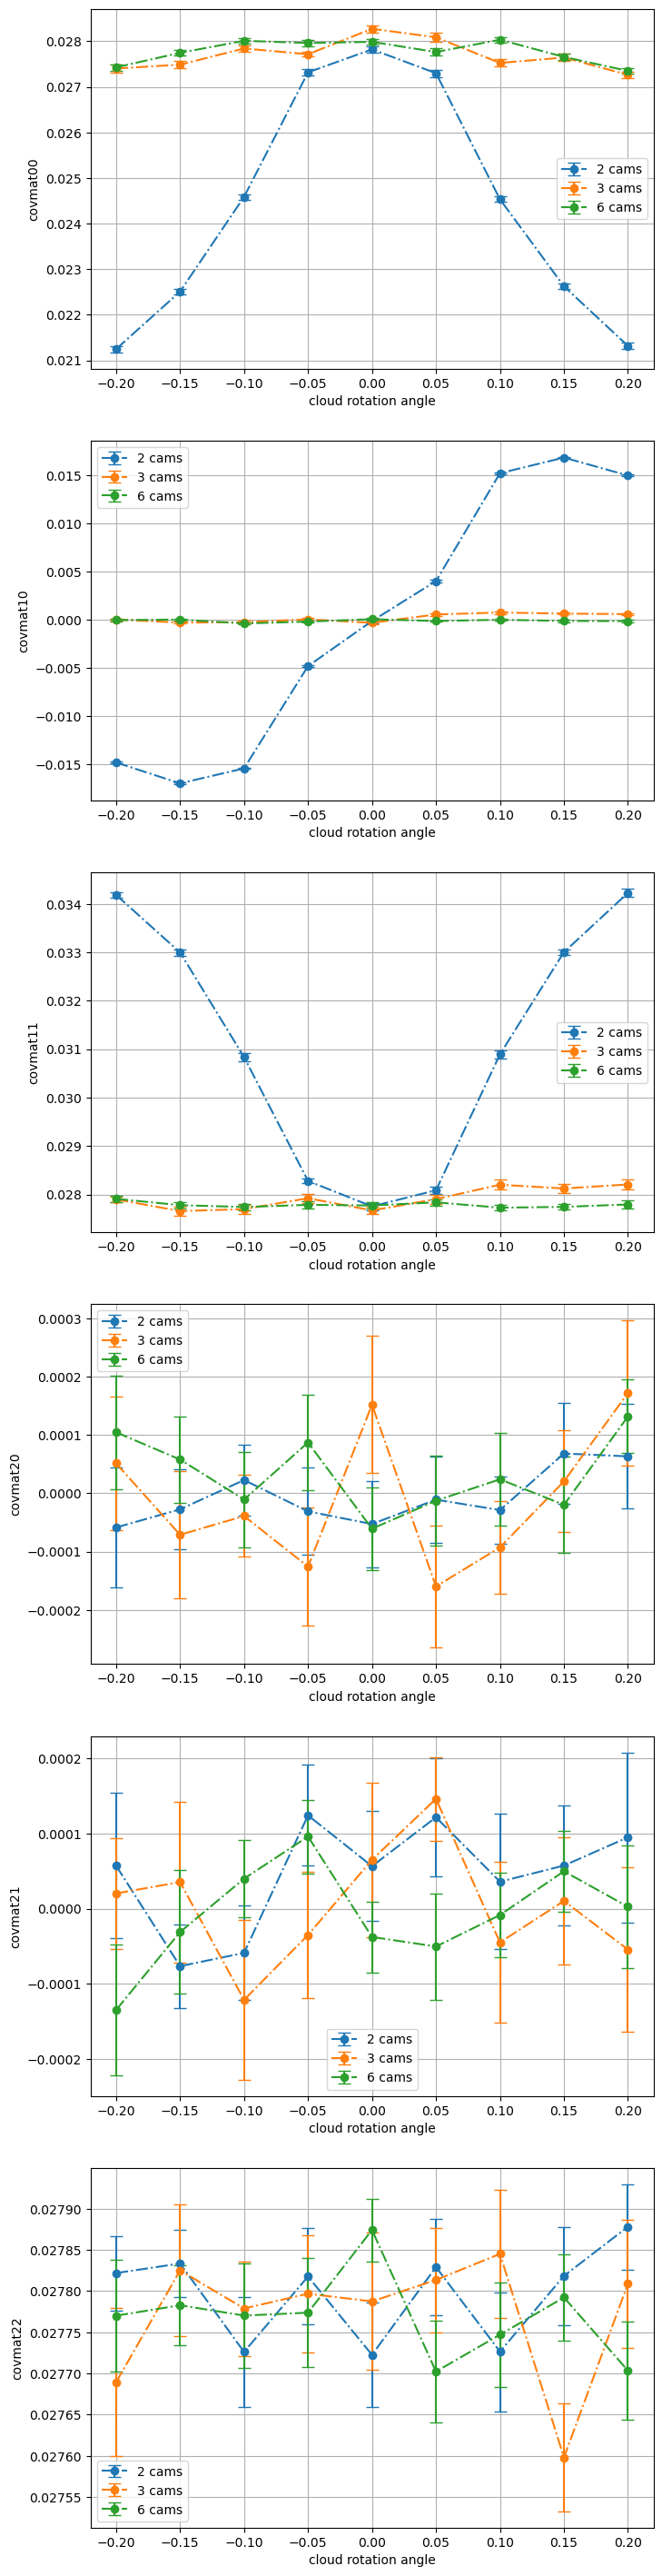

In [24]:



vars = ['covmat00', 'covmat10', 'covmat11', 'covmat20', 'covmat21', 'covmat22']
ylabels = ['covmat00', 'covmat10', 'covmat11', 'covmat20', 'covmat21', 'covmat22']
nrows = len(vars)
fig, ax = plt.subplots(nrows, 1, figsize=(8, nrows*6 ))

for var, ylabel, idx in zip(vars, ylabels, range(len(vars))):
    plt.sca(ax[idx])
    plt.errorbar(x, averages.groupby('ncams').get_group(2)[var], yerr=scale*stds.groupby('ncams').get_group(2)[var], capsize=5.0, fmt='-.o', label='2 cams')
    #plt.errorbar(x4, averages.groupby('ncams').get_group(4)[var], yerr=2.0*stds.groupby('ncams').get_group(4)[var], capsize=5.0, fmt='.', label='4 cams')
    plt.errorbar(x3, averages.groupby('ncams').get_group(3)[var], yerr=scale*stds.groupby('ncams').get_group(3)[var], capsize=5.0, fmt='-.o', label='3 cams')
    plt.errorbar(x6, averages.groupby('ncams').get_group(6)[var], yerr=scale*stds.groupby('ncams').get_group(6)[var], capsize=5.0, fmt='-.o', label='6 cams')
    plt.grid()
    plt.xlabel('cloud rotation angle')
    plt.ylabel(ylabel)
    plt.legend()

<AxesSubplot:>

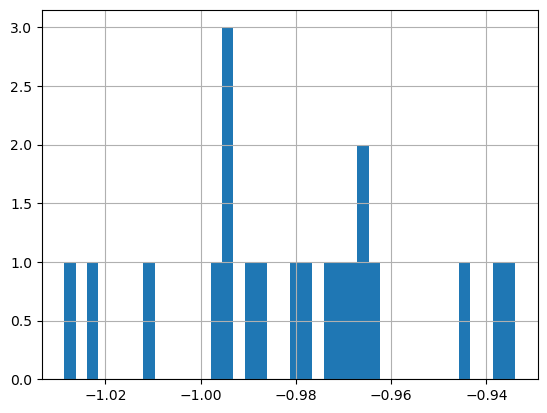

In [18]:
merged_df.groupby(['ncams','azim']).get_group((2, -0.1)).phi.hist(bins=40)